In [1]:
import pandas as pd
import os

In [2]:
import seaborn as sns
import numpy as np
import random

In [5]:
transactions = pd.read_csv("C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Business Project/H&M Dataset/transactions_train.csv")

In [6]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [7]:
print(transactions.info())
print(transactions.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB
None
(31788324, 5)


### Understanding the customer transactions
**We can see that the transaction data contains more than 30 million records. So we need to sample the records to get more conveient dataset for analysis. Before doing the sampling, we need to understand the data thoroughly for which we do exploratory data analysis.**

In [8]:
customer_idsgrouped = transactions.groupby("customer_id")["price"].mean()
print(type(customer_idsgrouped))
print(customer_idsgrouped.describe())
print(len(customer_idsgrouped))

<class 'pandas.core.series.Series'>
count    1.362281e+06
mean     2.875476e-02
std      1.429338e-02
min      7.627119e-04
25%      2.095763e-02
50%      2.613317e-02
75%      3.336083e-02
max      5.067797e-01
Name: price, dtype: float64
1362281


**From the above code shunk we get to know that there are 1362281 unique customer_ids**\
**Next we plot the distribution of the mean price or basket values of the customer_ids**

In [9]:
import matplotlib.pyplot as plt
#https://www.marsja.se/how-to-change-size-of-seaborn-plot/#:~:text=Now%2C%20if%20we%20only%20to%20increase%20Seaborn%20plot,%23%20Change%20seaborn%20plot%20size%20fig.set_size_inches%20%2812%2C%208%29

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Average Price Histogram with Density Plot')

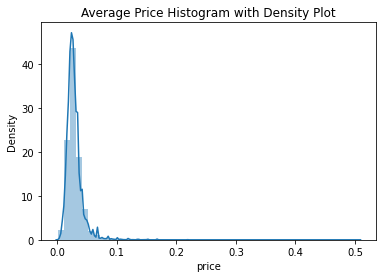

In [10]:
ax = sns.distplot(customer_idsgrouped)
ax.set_title('Average Price Histogram with Density Plot')

**We can see that the distribution plot of the mean prices are close to normal, so we donot need much treatment for normalizing the distribution.**

Since the distribution of the mean prices grouped by the customer ids lies in a normal distribution, we can sample the dataset by taking the customer ids and we can go by simple random sampling and stratified sampling. Post that we explore the mean price graphs for both the samples and check whether the distribution is normal.

In [11]:
random.seed(3)
randomsample_ids = random.sample(list(customer_idsgrouped.index), k = int(0.10*len(customer_idsgrouped.index)))
print(len(randomsample_ids))

136228


Checking the mean distribution plot of the sampled ids

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Average Price Histogram of sample with Density Plot')

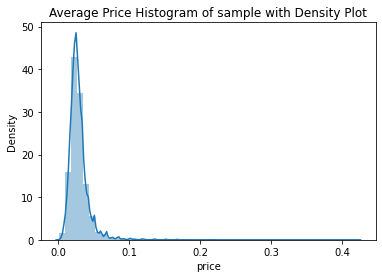

In [13]:
sample_custids_data  = customer_idsgrouped[customer_idsgrouped.index.isin(randomsample_ids)]
ax1 = sns.distplot(sample_custids_data)
ax1.set_title('Average Price Histogram of sample with Density Plot')

We see that the random sample gives us a similar density plot for the mean prices. Thus using the sample ids we extract sample from the original dataset.

In [14]:
transactions_sampled = transactions[transactions['customer_id'].isin(randomsample_ids)]
transactions_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3188599 entries, 14 to 31788290
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 146.0+ MB


Let us check the descriptive features of the random sampled data set vs the original data set

In [15]:
print(transactions.describe())
print(transactions.shape)
print(transactions_sampled.describe())
print(customer_idsgrouped.skew())
print(sample_custids_data.skew())

         article_id         price  sales_channel_id
count  3.178832e+07  3.178832e+07      3.178832e+07
mean   6.962272e+08  2.782927e-02      1.704028e+00
std    1.334480e+08  1.918113e-02      4.564786e-01
min    1.087750e+08  1.694915e-05      1.000000e+00
25%    6.328030e+08  1.581356e-02      1.000000e+00
50%    7.145820e+08  2.540678e-02      2.000000e+00
75%    7.865240e+08  3.388136e-02      2.000000e+00
max    9.562170e+08  5.915254e-01      2.000000e+00
(31788324, 5)
         article_id         price  sales_channel_id
count  3.188599e+06  3.188599e+06      3.188599e+06
mean   6.962539e+08  2.785591e-02      1.703008e+00
std    1.332213e+08  1.929524e-02      4.569330e-01
min    1.087750e+08  1.864407e-04      1.000000e+00
25%    6.328030e+08  1.579661e-02      1.000000e+00
50%    7.144260e+08  2.540678e-02      2.000000e+00
75%    7.863470e+08  3.388136e-02      2.000000e+00
max    9.537630e+08  5.915254e-01      2.000000e+00
4.197032766088607
4.1137320064599505


We see that there is a close similarity of the descriptive metrics of the features of the sampled and the original dataset. Though not refelcted in the distribution plots, we can see that there is a skewness in the price distributions of the data and the sample.

**Next we import the datasets containing the information about the articles and the customers**

In [16]:
products = pd.read_csv("C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Business Project/H&M Dataset/articles.csv")

In [17]:
products.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [18]:
print(products['article_id'].nunique())
print(transactions_sampled['article_id'].nunique())

105542
86260


In [19]:
product_transactions = pd.merge(transactions_sampled, products,how='left', left_on='article_id', right_on='article_id')

In [20]:
product_transactions.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,501820043,0.016932,2,501820,SIRPA,252,Sweater,Garment Upper body,...,Tops Knitwear,D,Divided,2,Divided,53,Divided Collection,1003,Knitwear,Jumper in a soft knit with a slightly wider ne...
1,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,501820043,0.016932,2,501820,SIRPA,252,Sweater,Garment Upper body,...,Tops Knitwear,D,Divided,2,Divided,53,Divided Collection,1003,Knitwear,Jumper in a soft knit with a slightly wider ne...
2,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,674681001,0.008458,2,674681,Felicia Tank,253,Vest top,Garment Upper body,...,Basic 1,D,Divided,2,Divided,51,Divided Basics,1002,Jersey Basic,Short top in ribbed jersey with narrow shoulde...


In [21]:
product_transactions.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id',
       'product_code', 'prod_name', 'product_type_no', 'product_type_name',
       'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [25]:
product_transactions = product_transactions[['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id',
       'product_code', 'prod_name', 'product_type_name',
       'product_group_name', 
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
      'perceived_colour_value_name',
       'perceived_colour_master_name',
      'department_name', 'index_code','index_name',
        'index_group_name',  'section_name',
       'garment_group_name', 'detail_desc', 'transaction_custdat_id']]

In [24]:
product_transactions['index_code'].nunique()

10

In [23]:
product_transactions['transaction_custdat_id'] = product_transactions['customer_id'] + product_transactions['t_dat']

In [26]:
product_transactions['transaction_custdat_id'].value_counts()

c2f0cdda2dc3042ccd9fcd8253fd8e368769840581e40aab1d87a64ff39987e32018-12-17    336
61da44a2758206d5701771f4315637b40c8321b511191654fb1430a6408e4dfa2019-02-23    176
6e91d482c348bc118d8d00df01b73f72471d194987616f1008074e4280c29ebb2019-01-31    174
75c54a755b8a467e53e0a4e01833deb029734feb22ad25438137925123a38f8b2018-09-29    169
c58c3ea821c5447217eadb8112175bcdfb10ba6c1905e38a451b4b0a107494802019-05-24    164
                                                                             ... 
73b9358207d5d3712ab947088916343cdc260a726904f2ef3ba29294d0f23eeb2019-01-22      1
325b2fb2f53746b68d4564797151418f28d92f0dc30608add12b269f4a4f1a7d2019-11-06      1
b2c470b1f57b96c69750cc0222df33bc5857b53ca98bc4f2c99e2cc7325967e52019-09-10      1
d9530829cea1ce0199e5b570d33120d1b3f9179c43f9e3ef0490967332cd5a7d2018-12-04      1
eb197acafe3d6ca914f4aa77caf2ecca1e587e447f2a57d79400de932e44e02a2019-07-10      1
Name: transaction_custdat_id, Length: 909708, dtype: int64

In [27]:
customers = pd.read_csv("C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Business Project/H&M Dataset/customers.csv")

In [175]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [29]:
print(customers['customer_id'].nunique())
print(customers.shape)

1048575
(1048575, 7)


In [30]:
customers.shape

(1048575, 7)

In [32]:
#full_data = pd.merge(product_transactions, customers, how = "left", left_on = "customer_id", right_on = "customer_id")

In [3]:
###since we have already created and exported full_data to the directory, we need to reimport it

full_data = pd.read_csv("C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Business Project/H&M Dataset/full_data_1.csv")

In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3188599 entries, 0 to 3188598
Data columns (total 25 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   t_dat                         object 
 2   customer_id                   object 
 3   article_id                    int64  
 4   price                         float64
 5   sales_channel_id              int64  
 6   product_code                  int64  
 7   prod_name                     object 
 8   product_type_name             object 
 9   product_group_name            object 
 10  graphical_appearance_name     object 
 11  colour_group_code             int64  
 12  colour_group_name             object 
 13  perceived_colour_value_name   object 
 14  perceived_colour_master_name  object 
 15  department_name               object 
 16  index_name                    object 
 17  section_name                  object 
 18  garment_group_name    

In [37]:
full_data['FN'].value_counts()

1.0    1051295
Name: FN, dtype: int64

In [38]:
full_data = full_data.drop(['index_code', 'index_group_name', 'FN', 'postal_code'], axis = 1)

In [39]:
full_data.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_name,product_group_name,graphical_appearance_name,...,department_name,index_name,section_name,garment_group_name,detail_desc,transaction_custdat_id,Active,club_member_status,fashion_news_frequency,age
0,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,501820043,0.016932,2,501820,SIRPA,Sweater,Garment Upper body,Solid,...,Tops Knitwear,Divided,Divided Collection,Knitwear,Jumper in a soft knit with a slightly wider ne...,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,NaN,ACTIVE,NONE,22.0
1,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,501820043,0.016932,2,501820,SIRPA,Sweater,Garment Upper body,Solid,...,Tops Knitwear,Divided,Divided Collection,Knitwear,Jumper in a soft knit with a slightly wider ne...,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,NaN,ACTIVE,NONE,22.0
2,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,674681001,0.008458,2,674681,Felicia Tank,Vest top,Garment Upper body,Solid,...,Basic 1,Divided,Divided Basics,Jersey Basic,Short top in ribbed jersey with narrow shoulde...,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,NaN,ACTIVE,NONE,22.0


Considering our analysis of purchase pattern most of the variables in the full data set are variables of interest. Some of the variables convey redundant information. The variables FN and detail_desc doesnot convey much information at least in the initial part of the study.

Most of the variables are related to product features. As a part of the EDA, we can check the associations between the different product features.

At first we check the number of missing values for the data.

Since there are 34 variables we have to cherry-pick the most important variables to be explored and analysed. Some of the most important variables are - t_dat, customer_id, article_id, price, sales_channel_id (not much useful since the sales channel name is not mentioned), product_name, product_type_name, product_group_name, graphical_appearance_name,colour_group_name, perceived_colour_value_name, perceived_colour_master_name, department_no, department_name, section_no, section_name, garment_group_name, active (status of customer), club_member_status, fashion_news_frequency

In [61]:
full_data.dropna(axis = 1, thresh = 4).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3188599 entries, 0 to 3188598
Data columns (total 25 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   t_dat                         object 
 2   customer_id                   object 
 3   article_id                    int64  
 4   price                         float64
 5   sales_channel_id              int64  
 6   product_code                  int64  
 7   prod_name                     object 
 8   product_type_name             object 
 9   product_group_name            object 
 10  graphical_appearance_name     object 
 11  colour_group_code             int64  
 12  colour_group_name             object 
 13  perceived_colour_value_name   object 
 14  perceived_colour_master_name  object 
 15  department_name               object 
 16  index_name                    object 
 17  section_name                  object 
 18  garment_group_name    

Converting the date variable to date format

In [41]:
#full_data['t_dat'] = str(full_data['t_datdatetime'])

In [42]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3188599 entries, 0 to 3188598
Data columns (total 24 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   t_dat                         object 
 1   customer_id                   object 
 2   article_id                    int64  
 3   price                         float64
 4   sales_channel_id              int64  
 5   product_code                  int64  
 6   prod_name                     object 
 7   product_type_name             object 
 8   product_group_name            object 
 9   graphical_appearance_name     object 
 10  colour_group_code             int64  
 11  colour_group_name             object 
 12  perceived_colour_value_name   object 
 13  perceived_colour_master_name  object 
 14  department_name               object 
 15  index_name                    object 
 16  section_name                  object 
 17  garment_group_name            object 
 18  detail_desc           

**Since we do not have transaction_ids in the dataset we can create a variable composed of the customer_id and the t_dat to get unique transactions.**

In [43]:
print(full_data['transaction_custdat_id'].value_counts().head())
print(full_data['transaction_custdat_id'].nunique())
#full_data['transaction_custdat_id'] = full_data['customer_id'] + full_data['t_dat']

c2f0cdda2dc3042ccd9fcd8253fd8e368769840581e40aab1d87a64ff39987e32018-12-17    336
61da44a2758206d5701771f4315637b40c8321b511191654fb1430a6408e4dfa2019-02-23    176
6e91d482c348bc118d8d00df01b73f72471d194987616f1008074e4280c29ebb2019-01-31    174
75c54a755b8a467e53e0a4e01833deb029734feb22ad25438137925123a38f8b2018-09-29    169
c58c3ea821c5447217eadb8112175bcdfb10ba6c1905e38a451b4b0a107494802019-05-24    164
Name: transaction_custdat_id, dtype: int64
909708


As we now have the unique transaction ids for each date, we can use it in our analysis. Some of the EDA questions are as follows

Is there any associations of the value of purchase and age of the customers?

Upon a closer look at the variables we can see different groups of feature variables - product features, graphical features, colour features, department features, department features, index features, section features, garment features, the others are demographic features of the customers. 

We need to analyse each feature group and understand assciation amongst the variables.

We need to cross analyse the feature groups and understand association amongst the variables and select features with highest variation.
The correlation should be high amonsgt the variables within the feature groups and less between the feature groups. The fetaures from the groups with high correlation can be dropped due to collinearity. The association of the picked variables should have high correlation with the target variable. The target variable can be the price.

Also we need to analyse the association of the feature groups with the demographic variables

**The full data must be cleaned to remove duplicate transactions**

In [41]:
full_data[full_data['transaction_custdat_id'] == 'c2f0cdda2dc3042ccd9fcd8253fd8e368769840581e40aab1d87a64ff39987e32018-12-17'].head(3)

,Unnamed: 0,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_name,product_group_name,...,department_name,index_name,section_name,garment_group_name,detail_desc,transaction_custdat_id,Active,club_member_status,fashion_news_frequency,age
384670,384670,2018-12-17,c2f0cdda2dc3042ccd9fcd8253fd8e368769840581e40a...,706733001,0.050831,2,706733,Cross Cardigan,Cardigan,Garment Upper body,...,Jersey inactive from s1,Menswear,Contemporary Street,Jersey Fancy,Cardigan in lightweight sweatshirt fabric with...,c2f0cdda2dc3042ccd9fcd8253fd8e368769840581e40a...,NaN,ACTIVE,NONE,52.0
384671,384671,2018-12-17,c2f0cdda2dc3042ccd9fcd8253fd8e368769840581e40a...,706733001,0.050831,2,706733,Cross Cardigan,Cardigan,Garment Upper body,...,Jersey inactive from s1,Menswear,Contemporary Street,Jersey Fancy,Cardigan in lightweight sweatshirt fabric with...,c2f0cdda2dc3042ccd9fcd8253fd8e368769840581e40a...,NaN,ACTIVE,NONE,52.0
384672,384672,2018-12-17,c2f0cdda2dc3042ccd9fcd8253fd8e368769840581e40a...,706733001,0.050831,2,706733,Cross Cardigan,Cardigan,Garment Upper body,...,Jersey inactive from s1,Menswear,Contemporary Street,Jersey Fancy,Cardigan in lightweight sweatshirt fabric with...,c2f0cdda2dc3042ccd9fcd8253fd8e368769840581e40a...,NaN,ACTIVE,NONE,52.0


We can see that there are multiple transactions isntances of the same product code. Some customers seemed to buy the same product in bulk volume. We have to confirm if the product_code represents unique items. If yes, then we can reduce the dataframe to unique items per record and create another variable called quantity of products for each unique product.

In [42]:
full_data['transaction_custdat_id'].nunique()

909708

In [49]:
#Let us confirm if product code indicates unique products
print(full_data['prod_name'].nunique())
print(full_data['product_type_name'].nunique())
print(full_data['graphical_appearance_name'].nunique())
print(full_data['product_group_name'].nunique())
print(full_data['garment_group_name'].nunique())

39160
128
30
19
21


**The garment_group_name is a broder category while the others are granular category**

The full_data is cleaned for duplicates using groupby and size. The same data is written to a folder. So we can import the file and reuse it directly.

In [69]:
x_data = full_data.groupby(['t_dat', 'customer_id', 'article_id', 'product_code',
       'prod_name', 'product_type_name', 'product_group_name',
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name', 'perceived_colour_master_name',
       'department_name', 'index_name', 'section_name', 'garment_group_name',
       'detail_desc', 'transaction_custdat_id', 'club_member_status',
       'fashion_news_frequency', 'age']).size().reset_index().\
    rename(columns={0:'records'})

In [85]:
#x_data.to_csv("C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Business Project/H&M Dataset/x_data_1.csv")

In [5]:
x_data = pd.read_csv("C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Business Project/H&M Dataset/x_data_1.csv")

In [9]:
x_data1 = pd.read_csv("C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Business Project/H&M Dataset/x_data_updatedSeptember.csv")

In [10]:
x_data.columns

Index(['Unnamed: 0', 't_dat', 'customer_id', 'article_id', 'product_code',
       'prod_name', 'product_type_name', 'product_group_name',
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name', 'perceived_colour_master_name',
       'department_name', 'index_name', 'section_name', 'garment_group_name',
       'detail_desc', 'transaction_custdat_id', 'club_member_status',
       'fashion_news_frequency', 'age', 'records', 'unique_id_items'],
      dtype='object')

In [11]:
x_data1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 't_dat', 'customer_id', 'article_id',
       'product_code', 'prod_name', 'product_type_name', 'product_group_name',
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name', 'perceived_colour_master_name',
       'department_name', 'index_name', 'section_name', 'garment_group_name',
       'detail_desc', 'transaction_custdat_id', 'club_member_status',
       'fashion_news_frequency', 'age', 'records',
       'mean_price_by_transactions_x', 'basketsizes', 'segment',
       'mean_price_by_customers'],
      dtype='object')

In [51]:
x_data.shape

(2153323, 22)

In [52]:
x_data['transaction_custdat_id'].value_counts()

75c54a755b8a467e53e0a4e01833deb029734feb22ad25438137925123a38f8b2018-09-29    159
898ede9fb639eb2aedb2d1d433eea958817e2bbb9f94524b3a0709af6fb5257e2019-11-12     76
898ede9fb639eb2aedb2d1d433eea958817e2bbb9f94524b3a0709af6fb5257e2019-02-21     59
8449c2d5192fde129f3a0fbe67998bbb8a55d4253082eeb4c832ce9635cf88262018-10-21     55
2e17f6f8bec3ab2ab14b071c6afa907606699cd67aeb4cedbda13b2809b3a7132019-04-06     54
                                                                             ... 
37798cf63f06852670e3fb95c07d13ab209135ccf957e0a226a8592a792f9cb52018-11-18      1
562778970727dbadf22096a20e5d9e003f021498d1650bb91908de2cfa39d94e2019-06-25      1
b29c6fff0b591d9da29215d2e7a02eb661973dc1a2ca382ff6f81ae57613fd632019-04-16      1
8906e525a1875205f696ae5b69ff63bafbec40e54903c3edec562dc4c9c6c97f2019-12-29      1
b8e01b89a9e3011f26771fc0281c11d6fdd32af6cf5bf394879a2f97c1b87f692020-03-20      1
Name: transaction_custdat_id, Length: 685925, dtype: int64

In [7]:
x_data['unique_id_items'] = x_data['transaction_custdat_id'] + str(x_data['article_id'])

In [8]:
print(x_data['transaction_custdat_id'].nunique())
print(x_data['unique_id_items'].nunique())

685925
685925


This confirms that all the transactions are unique transactions of uniques article ids.

**We have the merged total data of customers, products and transactions but we need to do step by step analysis on these data variables.**

### Step 1: Customer data analysis

### Step 2: Product Analysis

The data processed with the customer analysis is already exported to the folders and saved. The same is imported with the below code. The code have to be customized to the local folder of the working system directory. The dataset x_data_widsegments is provided along with the python code files.

In [ ]:
x_data_widsegments = pd.read_csv("C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Business Project/H&M Dataset/x_data_widsegments.csv")

In [162]:
import scipy.stats as stats

In [173]:
print('garment_group_name:', products['garment_group_name'].nunique())
print('product_type_name:', products['product_type_name'].nunique())
print('perceived_colour_master_name:', products['perceived_colour_master_name'].nunique())
print('graphical_appearance_name:', products['graphical_appearance_name'].nunique())

garment_group_name: 21
product_type_name: 131
perceived_colour_master_name: 20
graphical_appearance_name: 30


In [163]:
##Let us check the variation of product_type_name and prod_name across product_group_name by using chi square test
# create contingency table
data_crosstab = pd.crosstab(products['garment_group_name'],
                            products['product_type_name'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = products['garment_group_name'].unique()
columns = products['product_type_name'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 939237.1044052105  and p value is: 0.0
Null Hypothesis is rejected.


In [290]:
full_data.columns

Index(['Unnamed: 0', 't_dat', 'customer_id', 'article_id', 'price',
       'sales_channel_id', 'product_code', 'prod_name', 'product_type_name',
       'product_group_name', 'graphical_appearance_name', 'colour_group_code',
       'colour_group_name', 'perceived_colour_value_name',
       'perceived_colour_master_name', 'department_name', 'index_name',
       'section_name', 'garment_group_name', 'detail_desc',
       'transaction_custdat_id', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age'],
      dtype='object')

In [164]:
##Let us check the variation of product_type_name and prod_name across product_group_name by using chi square test
# create contingency table
data_crosstab = pd.crosstab(products['garment_group_name'],
                            products['perceived_colour_value_name'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = products['garment_group_name'].unique()
columns = products['perceived_colour_value_name'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 14358.554237580918  and p value is: 0.0
Null Hypothesis is rejected.


**Thus we have seen that prod_name, product_type_name and product_group_name are the most relevant fetaures to be analysed. Since product code is unique product identifier, we shall keep it for furthur reduction of dataset and records.**

In [174]:
##Let us check the variation of product_type_name and prod_name across product_group_name by using chi square test
# create contingency table
data_crosstab = pd.crosstab(products['garment_group_name'],
                            products['graphical_appearance_name'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = products['garment_group_name'].unique()
columns = products['graphical_appearance_name'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 126130.45429152496  and p value is: 0.0
Null Hypothesis is rejected.


From the above analysis we can conclude that there is significant association of graphical_appearance_name with product_group_name.

Thus the fetaure which seem important from the above anaysis are - product_code, prod_name, product_type_name, product_group_name, graphical_appearance_name

From the above analysis it seems the most important color features to be selected are - 'perceived_colour_value_name', 'perceived_color_master_name' 

In [177]:
x_data_widsegments = pd.read_csv("C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Business Project/H&M Dataset/x_data_widsegments.csv")

In [184]:
x_data_widsegment1 = x_data_widsegments[(x_data_widsegments['kmeanscluster'] == 1)]
x_data_widsegment2 = x_data_widsegments[(x_data_widsegments['kmeanscluster'] == 2)]
x_data_widsegment3 = x_data_widsegments[(x_data_widsegments['kmeanscluster'] == 3)]

In [185]:
import statistics
#statistics.mean(list1)

In [186]:
from mlxtend.preprocessing import TransactionEncoder

In [187]:
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

In [192]:
from itertools import permutations

**There is significant association amongst product groups ie. product_group_name\
There is significant association amongst product of a couple of graphical appearance.\
There is significant association amongst certain Product Types\
There is significant association amongst certain sections\
There is some association amongst the products of certain department_names**

All the metrics from apriori are encapsulated into functions for easy usage

In [188]:
def get_onehot(data, feature_variable):
    segtransrandsample = random.sample(data['transaction_custdat_id'].unique().tolist(), k = int(0.05*len(data['transaction_custdat_id'].unique().tolist())))
    print(len(segtransrandsample))
    segmentrandomsampled = data[data['transaction_custdat_id'].isin(segtransrandsample)]
    segmenttrans = pd.DataFrame(segmentrandomsampled.groupby('transaction_custdat_id')[feature_variable].unique())
    segmenttrans = segmenttrans.reset_index()
    segmenttrans = segmenttrans.drop('transaction_custdat_id', axis = 1)
    #mask = Septransaction_randomlist1['article_id'].apply(lambda x: any(item for item in segment1_favs if item in x))
    #Septransaction_list1 = Septransaction_list1[mask]
    segmenttranstolist = segmenttrans[feature_variable].apply(lambda x: x.tolist())
    segmenttranstolist = list(segmenttranstolist)
    encoder3 = TransactionEncoder().fit(segmenttranstolist)
    onehot3 = encoder3.transform(segmenttranstolist)
    onehot3 = pd.DataFrame(onehot3, columns = encoder3.columns_)
    return onehot3


In [189]:
def get_meansupport(data, feature_variable):
    segtransrandsample = random.sample(data['transaction_custdat_id'].unique().tolist(), k = int(0.05*len(data['transaction_custdat_id'].unique().tolist())))
    print(len(segtransrandsample))
    segmentrandomsampled = data[data['transaction_custdat_id'].isin(segtransrandsample)]
    segmenttrans = pd.DataFrame(segmentrandomsampled.groupby('transaction_custdat_id')[feature_variable].unique())
    segmenttrans = segmenttrans.reset_index()
    segmenttrans = segmenttrans.drop('transaction_custdat_id', axis = 1)
    #mask = Septransaction_randomlist1['article_id'].apply(lambda x: any(item for item in segment1_favs if item in x))
    #Septransaction_list1 = Septransaction_list1[mask]
    segmenttranstolist = segmenttrans[feature_variable].apply(lambda x: x.tolist())
    segmenttranstolist = list(segmenttranstolist)
    encoder3 = TransactionEncoder().fit(segmenttranstolist)
    onehot3 = encoder3.transform(segmenttranstolist)
    onehot3 = pd.DataFrame(onehot3, columns = encoder3.columns_)
    rules7 = list(permutations(onehot3.columns.tolist(),2))
    list7 = []
    for i in range(len(rules7)):
        x = np.logical_and(onehot3[rules7[i][0]], onehot3[rules7[i][1]]).mean()
        list7.append(x)
    return np.mean(list7)  

In [201]:
def get_sdsupport(data, feature_variable):
    segtransrandsample = random.sample(data['transaction_custdat_id'].unique().tolist(), k = int(0.05*len(data['transaction_custdat_id'].unique().tolist())))
    print(len(segtransrandsample))
    segmentrandomsampled = data[data['transaction_custdat_id'].isin(segtransrandsample)]
    segmenttrans = pd.DataFrame(segmentrandomsampled.groupby('transaction_custdat_id')[feature_variable].unique())
    segmenttrans = segmenttrans.reset_index()
    segmenttrans = segmenttrans.drop('transaction_custdat_id', axis = 1)
    #mask = Septransaction_randomlist1['article_id'].apply(lambda x: any(item for item in segment1_favs if item in x))
    #Septransaction_list1 = Septransaction_list1[mask]
    segmenttranstolist = segmenttrans[feature_variable].apply(lambda x: x.tolist())
    segmenttranstolist = list(segmenttranstolist)
    encoder3 = TransactionEncoder().fit(segmenttranstolist)
    onehot3 = encoder3.transform(segmenttranstolist)
    onehot3 = pd.DataFrame(onehot3, columns = encoder3.columns_)
    rules7 = list(permutations(onehot3.columns.tolist(),2))
    list7 = []
    for i in range(len(rules7)):
        x = np.logical_and(onehot3[rules7[i][0]], onehot3[rules7[i][1]]).mean()
        list7.append(x)
    print(len(list7))
    return np.std(list7)  

In [190]:
def get_maskedonehot(data, feature_variable, masking_var, masking_favs):
    segtransrandsample = random.sample(data['transaction_custdat_id'].unique().tolist(), k = int(0.05*len(data['transaction_custdat_id'].unique().tolist())))
    print(len(segtransrandsample))
    segmentrandomsampled = data[data['transaction_custdat_id'].isin(segtransrandsample)]
    segmenttrans = pd.DataFrame(segmentrandomsampled.groupby('transaction_custdat_id')[masking_var].unique())
    segmenttrans = segmenttrans.reset_index()
    mask = segmenttrans[masking_var].apply(lambda x: any(item for item in masking_favs if item in x))
    segmenttransmasked = segmenttrans[mask]
    trans_ids = segmenttransmasked['transaction_custdat_id'].unique().tolist()
    maskedsegment= data[data['transaction_custdat_id'].isin(trans_ids)]
    maskedsegment = pd.DataFrame(maskedsegment.groupby('transaction_custdat_id')[feature_variable].unique())
    maskedsegment = maskedsegment.reset_index()
    maskedsegment = maskedsegment.drop('transaction_custdat_id', axis = 1)
    segmenttranstolist = maskedsegment[feature_variable].apply(lambda x: x.tolist())
    segmenttranstolist = list(segmenttranstolist)`
    encoder3 = TransactionEncoder().fit(segmenttranstolist)
    onehot3 = encoder3.transform(segmenttranstolist)
    onehot3 = pd.DataFrame(onehot3, columns = encoder3.columns_)
    return onehot3

In [493]:
def get_topfrequentitems(onehotdf, min_support_num, max_len_num):
    frequent_itemsets = apriori(onehotdf, min_support = min_support_num, max_len = max_len_num, use_colnames = True)
    topitemsindex = frequent_itemsets['support'].sort_values(ascending = False).index
    top_frequent_itemsets = frequent_itemsets.loc[topitemsindex].head(20)
    return top_frequent_itemsets

In [207]:
x_data_widsegment3.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'X', 'Unnamed..0', 't_dat', 'customer_id',
       'article_id', 'product_code', 'prod_name', 'product_type_name',
       'product_group_name', 'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name', 'perceived_colour_master_name',
       'department_name', 'index_name', 'section_name', 'garment_group_name',
       'detail_desc', 'transaction_custdat_id', 'club_member_status',
       'fashion_news_frequency', 'age', 'records', 'unique_id_items',
       'age_bracket', 'memberships_and_FN', 't_datetime',
       'mean_pricebytransaction', 'segment', 'basketsizes', 'kmeanscluster',
       'mean_price_per_product'],
      dtype='object')

In [227]:
x1 = get_meansupport(x_data_widsegment3, 'product_type_name')
x2 = get_meansupport(x_data_widsegment3, 'product_type_name')
x3 = get_meansupport(x_data_widsegment3, 'product_type_name')
x4 = get_meansupport(x_data_widsegment3, 'product_type_name')
(x1+x2+x3+x4)/4

1592
1592
1592
1592


0.0030571357906088847

In [226]:
x1 = get_sdsupport(x_data_widsegment3, 'product_type_name')
x2 = get_sdsupport(x_data_widsegment3, 'product_type_name')
x3 = get_sdsupport(x_data_widsegment3, 'product_type_name')
x4 = get_sdsupport(x_data_widsegment3, 'product_type_name')

(x1+x2+x3+x4)/4

19637
10506
19637
10712
19637
11130
19637
11342


0.0021811486056317513

In [196]:
seg2pgonehot = get_onehot(x_data_widsegment1, 'garment_group_name')
frequent_itemsets = apriori(seg2pgonehot, min_support = 0.008, max_len = 3, use_colnames = True)
topitemsindex = frequent_itemsets['support'].sort_values(ascending = False).index
frequent_itemsets.loc[topitemsindex].head(20)

13038


,support,itemsets
5,0.291686,(Jersey Fancy)
15,0.197116,(Trousers)
1,0.175487,(Blouses)
6,0.172342,(Knitwear)
4,0.170272,(Jersey Basic)
3,0.135987,(Dresses Ladies)
17,0.129314,"(Under-, Nightwear)"
0,0.100399,(Accessories)
16,0.090658,(Trousers Denim)
7,0.068722,(Outdoor)


In [579]:
onehotdf2 = get_maskedonehot(x_data_widsegment3, 'graphical_appearance_name', 'garment_group_name', ['Jersey Fancy', 'Trousers', 'Blouses', 'Jersey Basic', 'Knitwear', 'Dresses Ladies', 'Under-, Nightwear'])
frequentitemset2 = get_topfrequentitems(onehotdf2, 0.01, 3)
print(frequentitemset2)
#frequentitemset2.to_csv("C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Business Project/H&M Dataset/frequent_itemdatasets/seg3_freqgggraphicalappearance.csv")

1592
      support                            itemsets
20   0.944832                             (Solid)
0    0.509078                  (All over pattern)
39   0.481145           (All over pattern, Solid)
12   0.303073                           (Melange)
100  0.293296                    (Melange, Solid)
5    0.289106                             (Denim)
71   0.282123                      (Denim, Solid)
21   0.272346                            (Stripe)
113  0.263966                     (Stripe, Solid)
40   0.171089          (Stripe, All over pattern)
162  0.166201   (Stripe, All over pattern, Solid)
27   0.158520           (Denim, All over pattern)
133  0.157123    (Denim, All over pattern, Solid)
34   0.142458         (Melange, All over pattern)
154  0.140363  (Melange, All over pattern, Solid)
11   0.127095                              (Lace)
96   0.121508                       (Lace, Solid)
17   0.117318                   (Other structure)
108  0.114525            (Other structure, So

In [577]:
rules = association_rules(frequentitemset2, metric = "support", min_threshold = 0.01)
print(rules)
print(type(rules))
top_antecedants = rules['antecedent support'].quantile(0.35)
top_concequents = rules['consequent support'].quantile(0.35)
topoverallsupport = rules['support'].quantile(0.45)
topconfidence = rules['confidence'].quantile(0.70)
toplift = rules['lift'].quantile(0.45)
topconviction = rules['conviction'].quantile(0.45)
pruned_rules = rules[(rules['support'] >= topoverallsupport) & (rules['confidence'] >= topconfidence)]
print(pruned_rules)
#pruned_rules.to_csv("C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Business Project/H&M Dataset/frequent_itemdatasets/seg3_rulesggcolourname.csv")

       antecedents     consequents  antecedent support  consequent support  \
0          (White)         (Black)            0.553385            0.844382   
1          (Black)         (White)            0.844382            0.553385   
2           (Blue)         (Black)            0.549197            0.844382   
3          (Black)          (Blue)            0.844382            0.549197   
4           (Blue)         (White)            0.549197            0.553385   
5          (White)          (Blue)            0.553385            0.549197   
6           (Grey)         (Black)            0.386602            0.844382   
7          (Black)          (Grey)            0.844382            0.386602   
8          (Beige)         (Black)            0.360084            0.844382   
9          (Black)         (Beige)            0.844382            0.360084   
10   (Blue, White)         (Black)            0.345429            0.844382   
11   (Blue, Black)         (White)            0.478716          